In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns


> you can check this notebook if you want to know How to implement a DT from scratch ! 👀 
 [Decision Tree From Scratch](https://www.kaggle.com/code/fareselmenshawii/decision-tree-from-scratch)

# <span style="color : salmon">Decision Tree</span>
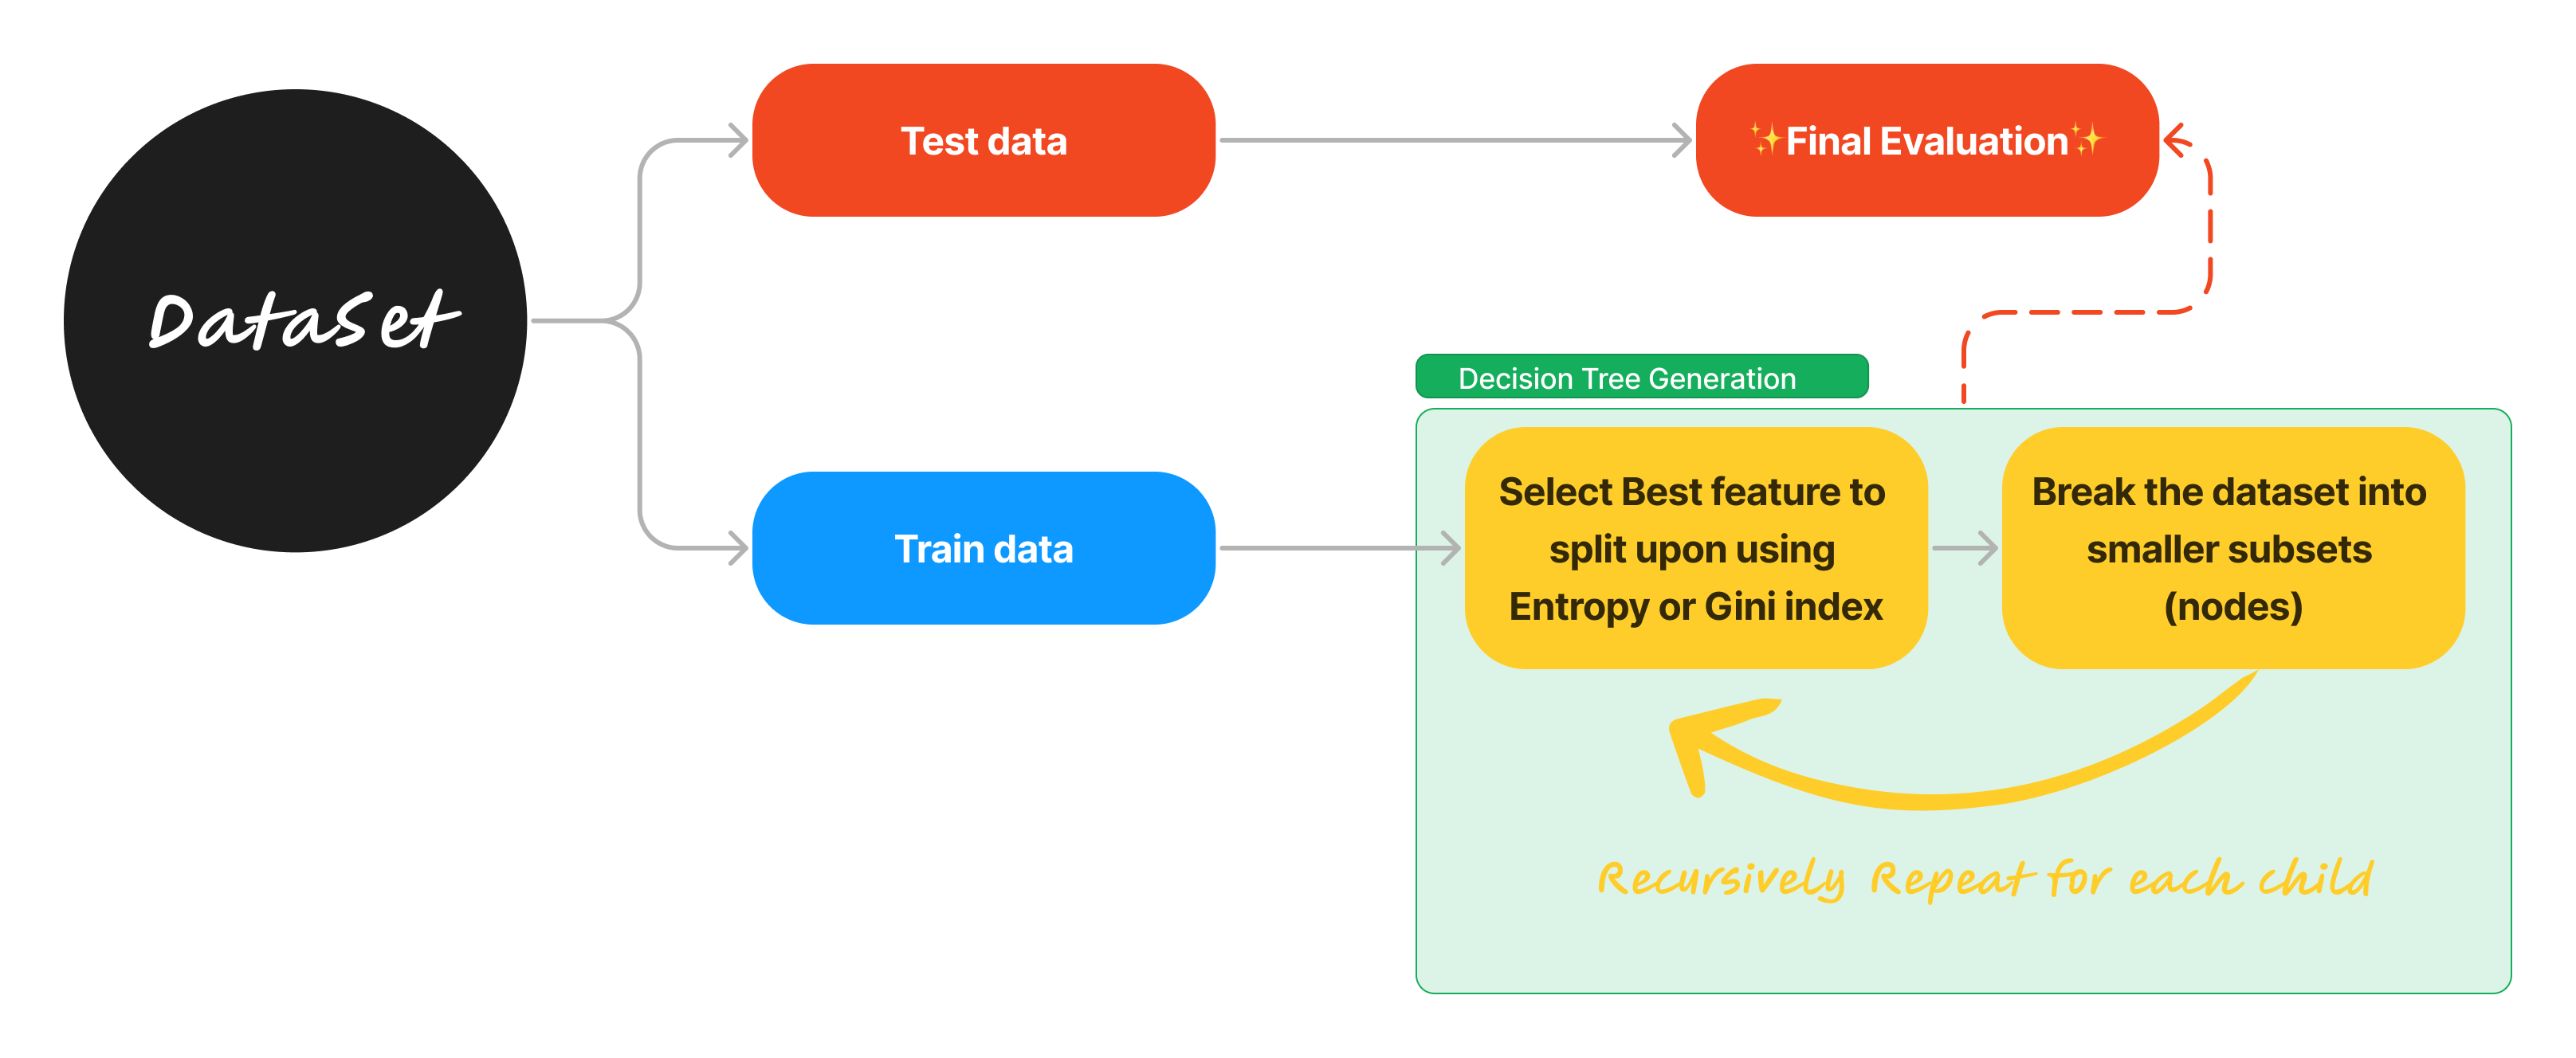

## <span style="color: Red">Drugs💊 dataset</span>
Imagine that you are a medical researcher🥼 compiling data for a study. You have collected data about a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug c, Drug x and y.

Part of your job is to build a model to find out which drug might be appropriate for a future patient with the same illness. <span style="color:yellow">The features of this dataset are Age, Sex, Blood Pressure, and the Cholesterol of the patients</span>, and the target is the drug that each patient responded to.

It is a sample of multiclass classifier, and you can use the training part of the dataset to build a decision tree, and then use it to predict the class of a unknown patient, or to prescribe a drug to a new patient.

In [24]:
# importing Drugs dataset 
drugs = pd.read_csv('drug200.csv')
drugs

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


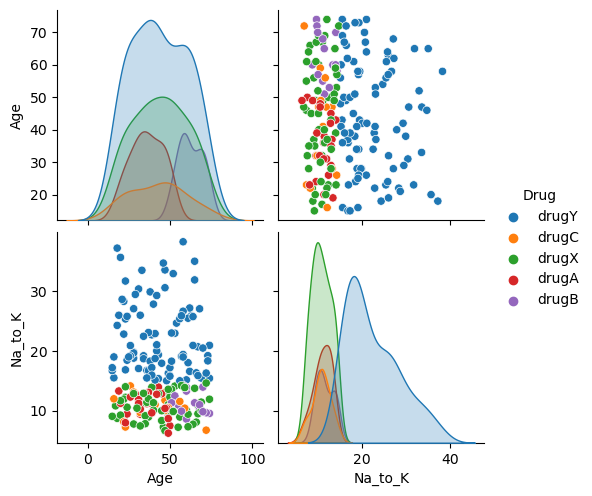

In [3]:
sns.pairplot(data=drugs, hue='Drug')

In [12]:
# let's see some info about the data 
drugs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [5]:
# let's see the categorical features
drugs.describe(include='O')

,Sex,BP,Cholesterol,Drug
count,200,200,200,200
unique,2,3,2,5
top,M,HIGH,HIGH,drugY
freq,104,77,103,91


In [9]:
for i in drugs.select_dtypes(include='O').columns:
    print(drugs[i].value_counts())
    print("-"*50)

M    104
F     96
Name: Sex, dtype: int64
--------------------------------------------------
HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64
--------------------------------------------------
HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64
--------------------------------------------------
drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64
--------------------------------------------------


In [25]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

ordinal_encoder = OrdinalEncoder()
label_encoder = LabelEncoder()

# For Sex (using LabelEncoder - needs single column input)
drugs['Sex'] = label_encoder.fit_transform(drugs['Sex']) 

# For BP and Cholesterol (using OrdinalEncoder - correct column access)
drugs[['BP', 'Cholesterol']] = ordinal_encoder.fit_transform(drugs[['BP', 'Cholesterol']])


# Encode target (nominal categories)
drugs['Drug'] = label_encoder.fit_transform(drugs['Drug'])

In [76]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

drugs['Age'] = scaler.fit_transform(drugs[['Age']])

In [77]:
display(drugs.head(5))

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,-1.291591,0,0.0,0.0,25.355,4
1,0.162699,1,1.0,0.0,13.093,2
2,0.162699,1,1.0,0.0,10.114,2
3,-0.988614,0,2.0,0.0,7.798,3
4,1.011034,0,1.0,0.0,18.043,4


In [28]:
# dividing the data into X, y 
# X: the features 
# y : the target 🎯 
X = drugs.drop(columns='Drug')
y = drugs['Drug']

In [51]:
# now we need to split the data into train set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.45, random_state=42 , stratify=y)

In [52]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((110, 5), (90, 5), (110,), (90,))

In [78]:
from sklearn.tree import DecisionTreeClassifier as DTC

# Building the model 
tree_clf0 = DTC()

In [79]:
tree_clf0.fit(X_train,y_train)

DecisionTreeClassifier()

In [80]:
# let's see the model score (acc) on the training set 
tree_clf0.score(X_train, y_train)

1.0

In [81]:
# let's see the model score on the test set
tree_clf0.score(X_test, y_test)

0.9666666666666667

In [82]:
# another way of calculating the accuracy
from sklearn.metrics import accuracy_score, classification_report
y_pred = tree_clf0.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9666666666666667

In [83]:
# third way using more than one metric 
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       1.00      0.86      0.92         7
           2       0.78      1.00      0.88         7
           3       1.00      1.00      1.00        24
           4       1.00      0.95      0.97        41

    accuracy                           0.97        90
   macro avg       0.94      0.96      0.95        90
weighted avg       0.97      0.97      0.97        90



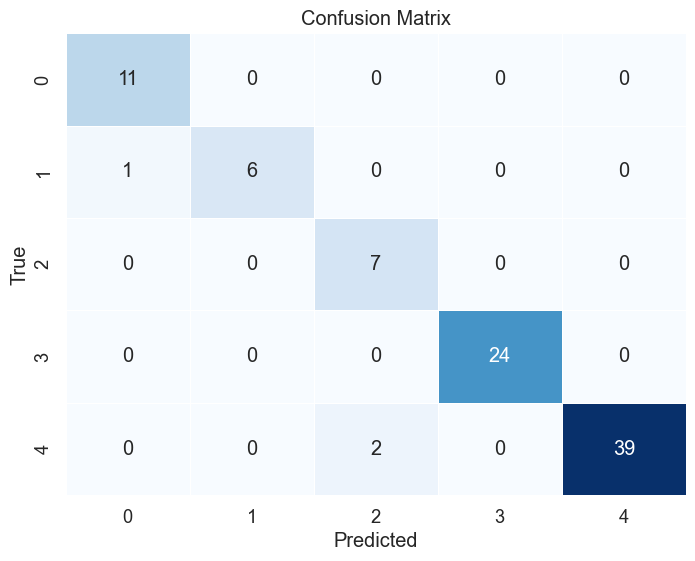

In [84]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", linewidths=0.5, cbar=False, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

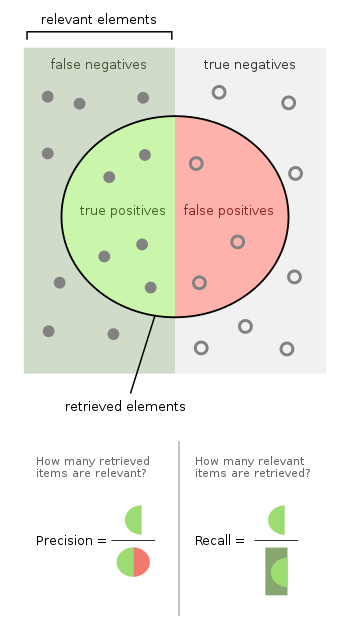

https://en.wikipedia.org/wiki/Precision_and_recall

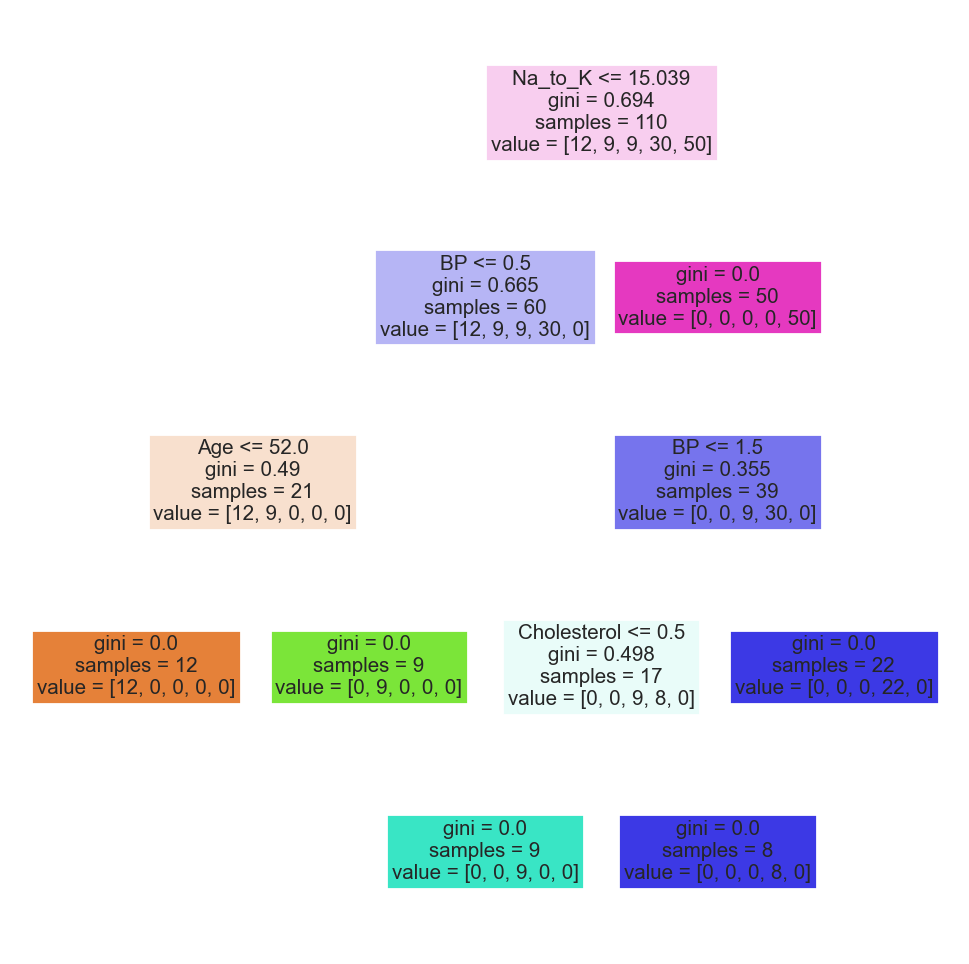

In [67]:
# visualsing👀 the Decision Tree🌳 
from sklearn.tree import plot_tree
plt.figure(figsize=(6, 6), dpi=200)
plot_tree(tree_clf0, feature_names=drugs.columns, filled=True)
plt.show()

# <span style="color : salmon">Cross Validation </span>
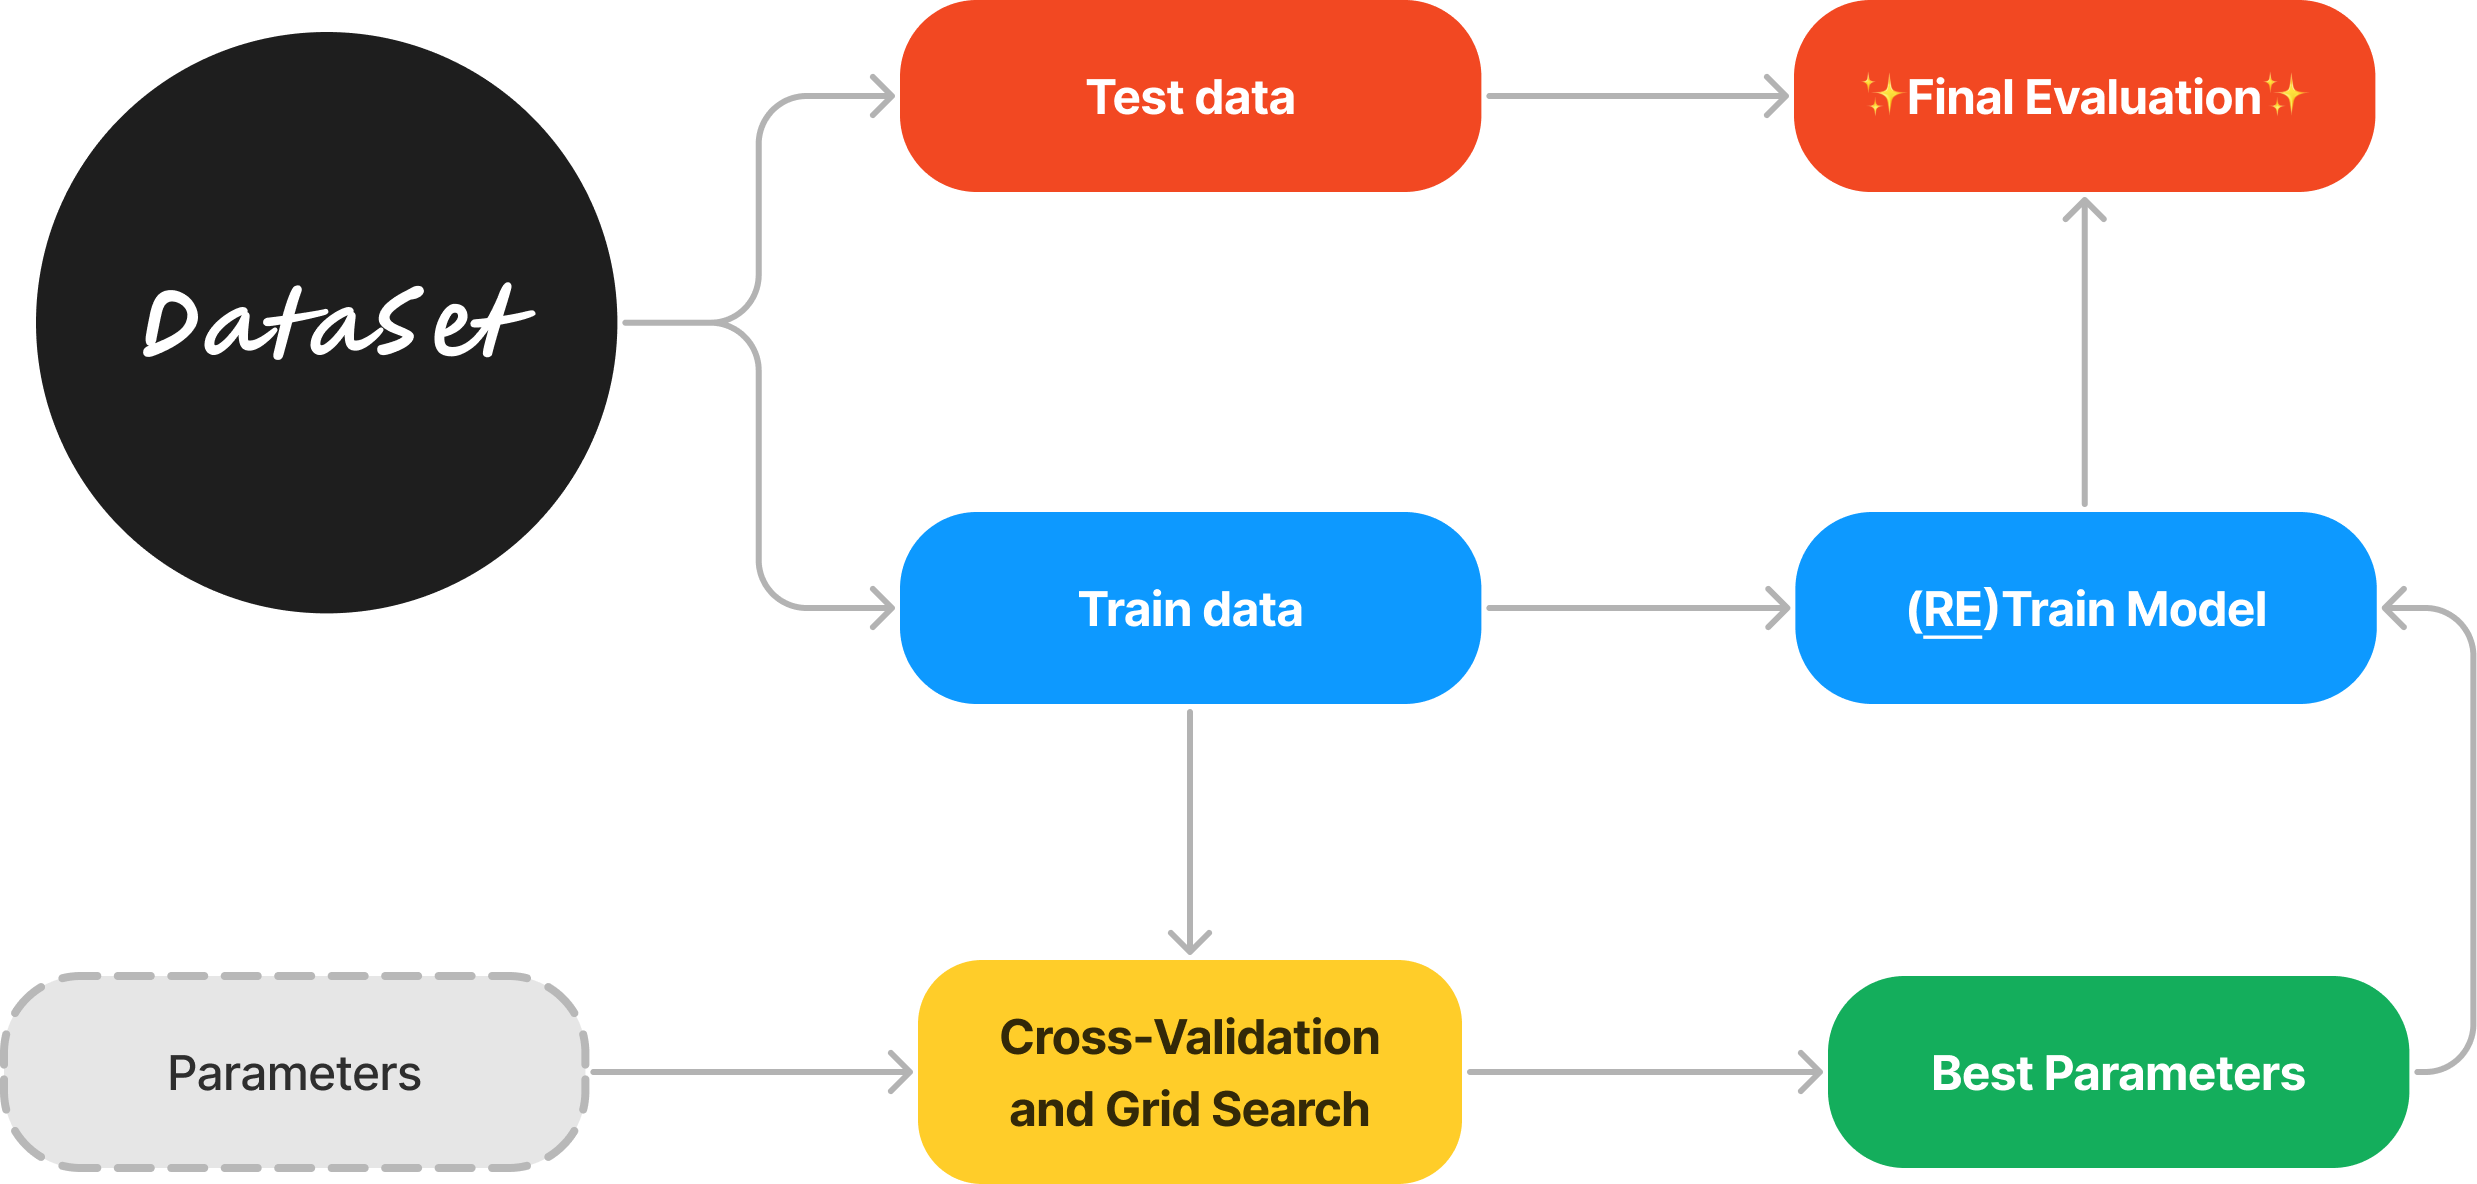

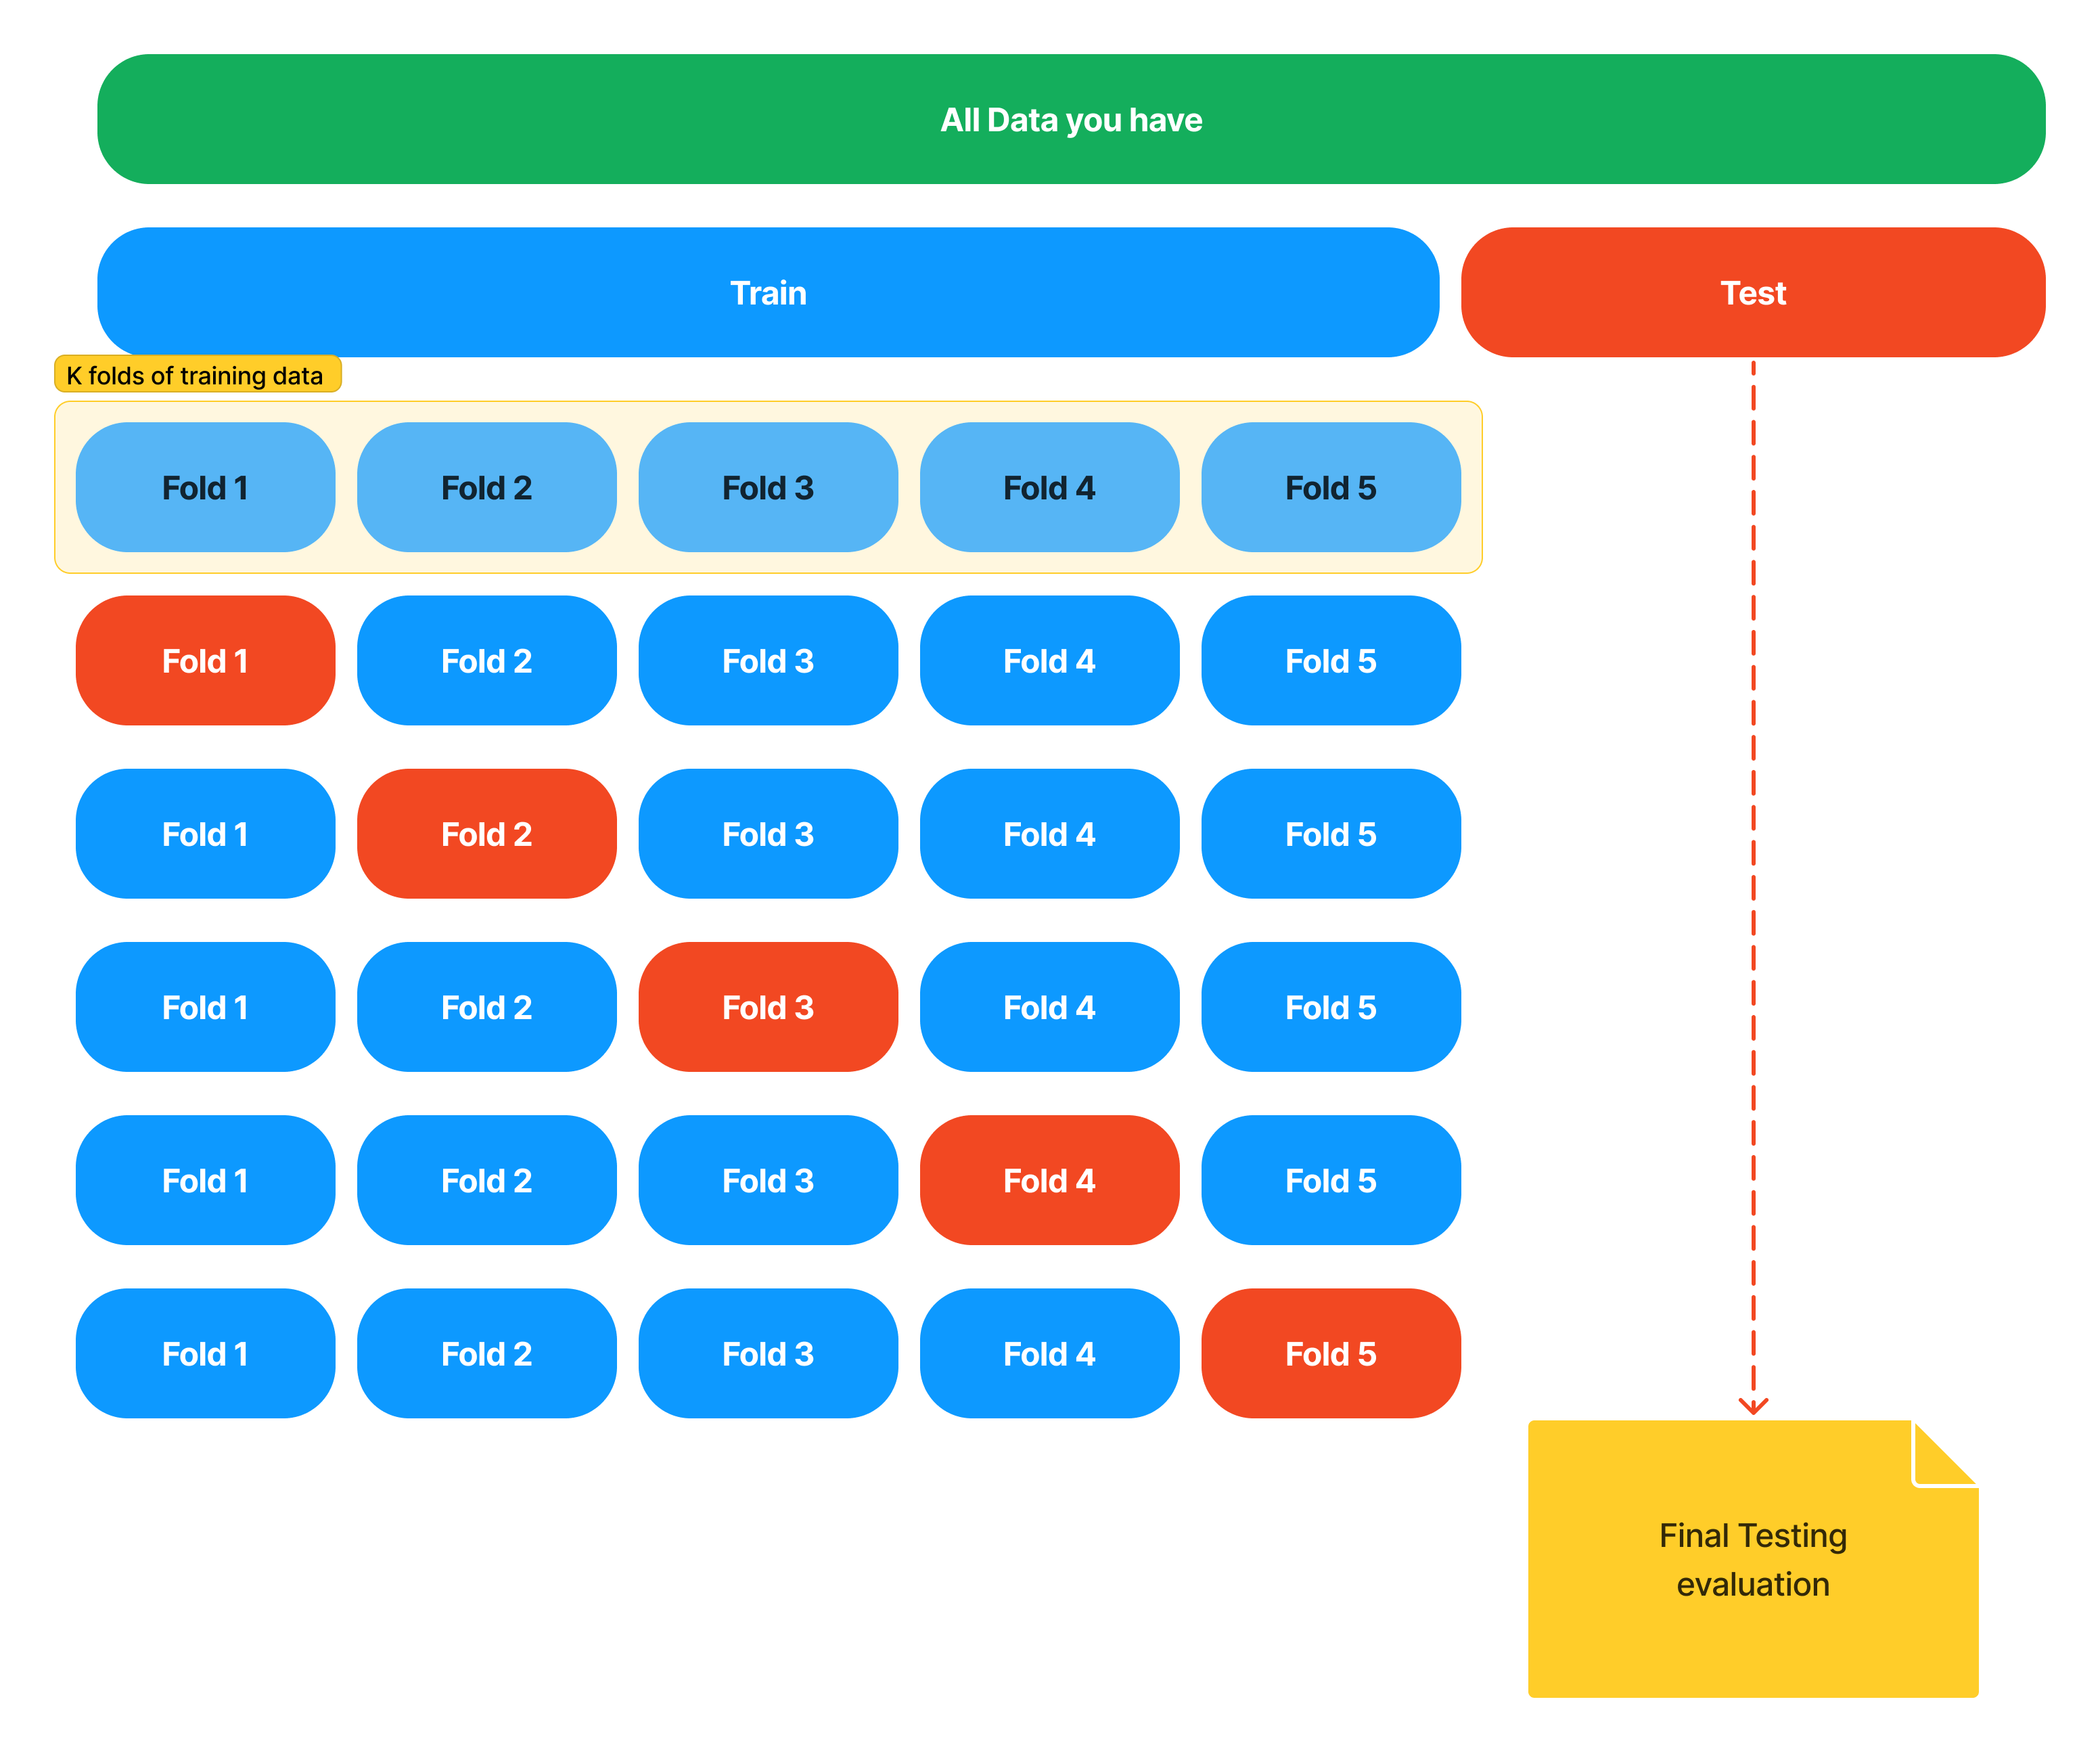

In [68]:
# using cross validation 
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation (you can change the number of folds as needed)
cv_scores = cross_val_score(tree_clf0, X_train, y_train, cv=5)


# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())


Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean CV Score: 1.0


In [163]:
DTC?

Init signature:

DTC(

    *,

    criterion='gini',

    splitter='best',

    max_depth=None,

    min_samples_split=2,

    min_samples_leaf=1,

    min_weight_fraction_leaf=0.0,

    max_features=None,

    random_state=None,

    max_leaf_nodes=None,

    min_impurity_decrease=0.0,

    class_weight=None,

    ccp_alpha=0.0,

)

Docstring:     

A decision tree classifier.



Read more in the :ref:`User Guide <tree>`.



Parameters

----------

criterion : {"gini", "entropy"}, default="gini"

    The function to measure the quality of a split. Supported criteria are

    "gini" for the Gini impurity and "entropy" for the information gain.



splitter : {"best", "random"}, default="best"

    The strategy used to choose the split at each node. Supported

    strategies are "best" to choose the best split and "random" to choose

    the best random split.



max_depth : int, default=None

    The maximum depth of the tree. If None, then nodes are expanded until

    all leaves are p

# <span style="color: skyblue">GRID SEARCH</span>

In [69]:
from sklearn.model_selection import GridSearchCV



param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(tree_clf0, param_grid, cv=5, scoring='accuracy', n_jobs=-1)


In [70]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [71]:
grid_search.best_params_

{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [72]:
best_tree = grid_search.best_estimator_

In [73]:
best_tree

DecisionTreeClassifier()

In [85]:
print(f"train score {best_tree.score(X_train, y_train)}")
print(f"test score {best_tree.score(X_test, y_test)}")

train score 1.0
test score 0.9666666666666667


## Resources ? 
- <a href="https://youtu.be/fSytzGwwBVw?si=zsEluJ1JUrdUhENg">Cross Validation</a>
- <a href="https://youtu.be/HdlDYng8g9s?si=SvQik15WLDSmdcj0">Grid Search</a>